# Import thư viện

In [6]:
# Thư viện cơ bản
import pandas as pd
import numpy as np


# Thư viện vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# Bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Thư viện tiền xử lý dữ liệu
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, label_binarize, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier

# Thư viện mô hình
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Thư viện đánh giá mô hình
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc, confusion_matrix, precision_recall_curve, f1_score

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [8]:
# Tập train chiếm 75% dữ liệu
train.shape

(59381, 128)

In [9]:
test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Tập test chiếm 25% dữ liệu
test.shape

(19765, 127)

- Tổng số dòng của dữ liệu: 79146
- Tổng số cột của dữ liệu: 128

# Tiền xử lý tập train

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,59381.0,39507.211515,22815.883089,2.0,19780.000000,39487.000000,59211.000000,79146.0
Product_Info_1,59381.0,1.026355,0.160191,1.0,1.000000,1.000000,1.000000,2.0
Product_Info_3,59381.0,24.415655,5.072885,1.0,26.000000,26.000000,26.000000,38.0
Product_Info_4,59381.0,0.328952,0.282562,0.0,0.076923,0.230769,0.487179,1.0
Product_Info_5,59381.0,2.006955,0.083107,2.0,2.000000,2.000000,2.000000,3.0
...,...,...,...,...,...,...,...,...
Medical_Keyword_45,59381.0,0.013691,0.116207,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_46,59381.0,0.008488,0.091737,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_47,59381.0,0.019905,0.139676,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_48,59381.0,0.054496,0.226995,0.0,0.000000,0.000000,0.000000,1.0


In [12]:
train['Response'].value_counts()

Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64

In [13]:
train['Response'].value_counts() / len(train) * 100

Response
8    32.820262
6    18.916825
7    13.517792
2    11.033832
1    10.452838
5     9.147707
4     2.404810
3     1.705933
Name: count, dtype: float64

Text(0.5, 1.0, 'Nhãn trước khi gộp')

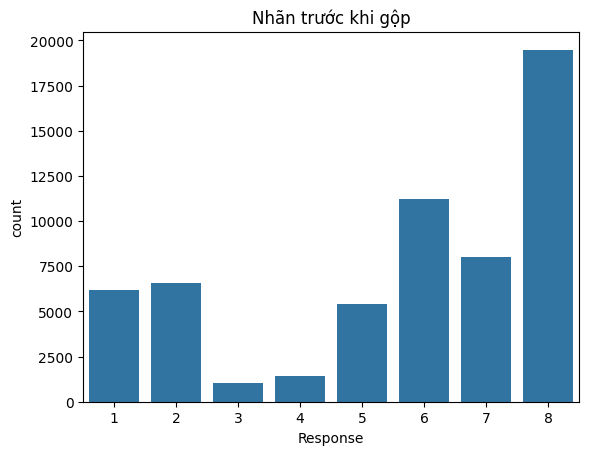

In [14]:
# Biểu đồ phân phối nhãn
sns.countplot(x=train['Response'])
plt.title("Nhãn trước khi gộp")
# Nhãn phân phối khá lệch

In [15]:
# Gộp nhãn mới như sau:
# Rủi ro thấp: 1, 2, 3 = 1
# Rủi ro trung bình: 4, 5, 6 = 2
# Rủi ro cao: 7, 8 = 3
def map_response(x):
    if x in [1, 2, 3]:
        return 1
    elif x in [4, 5, 6]:
        return 2
    else:
        return 3
train['Response'] = train['Response'].map(map_response)

In [16]:
train['Response'].value_counts()

Response
3    27516
2    18093
1    13772
Name: count, dtype: int64

In [17]:
train['Response'].value_counts() / len(train) * 100

Response
3    46.338054
2    30.469342
1    23.192604
Name: count, dtype: float64

Text(0.5, 1.0, 'Nhãn sau khi gộp')

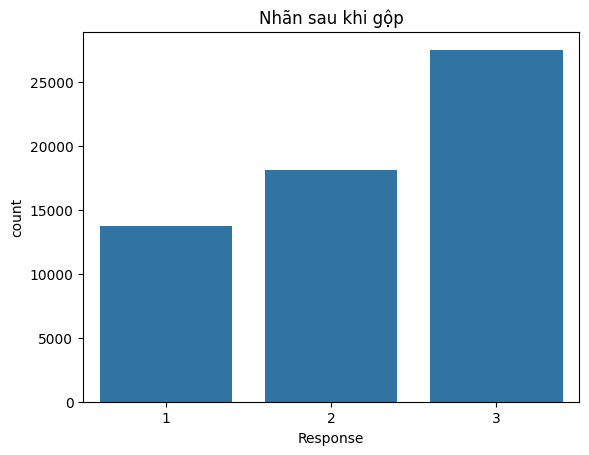

In [18]:
# Nhãn đã được phân phối lại
sns.countplot(x = train['Response'])
plt.title("Nhãn sau khi gộp")

In [19]:
le = LabelEncoder()
# Chuyển cột định tính thành định lượng
train['Product_Info_2'] = le.fit_transform(train['Product_Info_2'])

In [20]:
# Drop cột không cần thiết
train.drop(columns=['Id'], inplace=True)

In [21]:
# Xem các cột null trong tập train
train_null_cols = train.isnull().sum()[train.isnull().sum() > 0]
train_null_cols

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

In [22]:
# Xem tỉ lệ các cột null trong tập train
train_null_cols / len(train) * 100

Employment_Info_1       0.031997
Employment_Info_4      11.416110
Employment_Info_6      18.278574
Insurance_History_5    42.767889
Family_Hist_2          48.257860
Family_Hist_3          57.663226
Family_Hist_4          32.306630
Family_Hist_5          70.411411
Medical_History_1      14.969435
Medical_History_10     99.061990
Medical_History_15     75.101463
Medical_History_24     93.598963
Medical_History_32     98.135767
dtype: float64

In [23]:
# Drop tất cả cột có tỉ lệ null >= 50%
train = train.loc[:, train.isnull().mean() < 0.5]

In [24]:
# Xem tỉ lệ null của các cột còn lại
train.isnull().sum()[train.isnull().sum() > 0] / len(train) * 100

Employment_Info_1       0.031997
Employment_Info_4      11.416110
Employment_Info_6      18.278574
Insurance_History_5    42.767889
Family_Hist_2          48.257860
Family_Hist_4          32.306630
Medical_History_1      14.969435
dtype: float64

In [25]:
# Fill null với trung vị theo nhãn
for cols in train.columns:
    if train[cols].isnull().sum() > 0 and cols != 'Response':
        train[cols] = train.groupby('Response')[cols].transform(lambda x: x.fillna(x.median()))

# Tiền xử lý tập test

In [26]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,19765.0,39772.653883,22942.157493,1.0,19792.000000,39898.000000,59758.000000,79129.0
Product_Info_1,19765.0,1.024994,0.156110,1.0,1.000000,1.000000,1.000000,2.0
Product_Info_3,19765.0,24.321730,5.184879,2.0,26.000000,26.000000,26.000000,37.0
Product_Info_4,19765.0,0.324381,0.279439,0.0,0.076923,0.230769,0.487179,1.0
Product_Info_5,19765.0,2.006527,0.080526,2.0,2.000000,2.000000,2.000000,3.0
...,...,...,...,...,...,...,...,...
Medical_Keyword_44,19765.0,0.008247,0.090440,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_45,19765.0,0.013559,0.115655,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_46,19765.0,0.008601,0.092345,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_47,19765.0,0.018315,0.134092,0.0,0.000000,0.000000,0.000000,1.0


In [27]:
# Chuyển cột định tính thành định lượng với thông tin đã huấn luyện từ tập train
test['Product_Info_2'] = le.transform(test['Product_Info_2'])

In [28]:
# Drop cột không cần thiết
test.drop(columns=['Id'], inplace=True)

In [29]:
# Xem các cột null trong tập test
test_null_cols = test.isnull().sum()[test.isnull().sum() > 0]
test_null_cols

Employment_Info_1          3
Employment_Info_4       2137
Employment_Info_6       3787
Insurance_History_5     8105
Family_Hist_2           9880
Family_Hist_3          11064
Family_Hist_4           6677
Family_Hist_5          13624
Medical_History_1       2972
Medical_History_10     19564
Medical_History_15     14864
Medical_History_24     18585
Medical_History_32     19414
dtype: int64

In [30]:
# Xem tỉ lệ các cột null trong tập test
test_null_cols / len(test) * 100

Employment_Info_1       0.015178
Employment_Info_4      10.812041
Employment_Info_6      19.160132
Insurance_History_5    41.006830
Family_Hist_2          49.987351
Family_Hist_3          55.977738
Family_Hist_4          33.781938
Family_Hist_5          68.929927
Medical_History_1      15.036681
Medical_History_10     98.983051
Medical_History_15     75.203643
Medical_History_24     94.029851
Medical_History_32     98.224134
dtype: float64

In [31]:
# Drop tất cả cột có tỉ lệ null >= 50%
test = test.loc[:, test.isnull().mean() < 0.5]

In [32]:
# Xem tỉ lệ null của các cột còn lại
test.isnull().sum()[test.isnull().sum() > 0] / len(test) * 100

Employment_Info_1       0.015178
Employment_Info_4      10.812041
Employment_Info_6      19.160132
Insurance_History_5    41.006830
Family_Hist_2          49.987351
Family_Hist_4          33.781938
Medical_History_1      15.036681
dtype: float64

In [33]:
# Lấy median theo nhãn từ train
# Vì file test không có nhãn, nên phải lấy median của từng cột theo file train, rồi fill null cho file test
fill_values = train.groupby('Response').median()

In [34]:
# Fill theo nhãn phổ biến nhất (nhãn 2)
default_class = 2

# Fill null với trung vị theo nhãn
for cols in test.columns:
    if test[cols].isnull().sum() > 0:
        test[cols] = test[cols].fillna(fill_values.loc[default_class, cols])

# Chia Train, Validation

- Lí do chia tập dữ liệu train thành train và valid là do tập test không có nhãn
- => phải huấn luyện và kiểm tra trên train và valid sau đó đưa dự đoán vào test

In [35]:
# Tách dữ liệu: X - thuộc tính | y - nhãn
X = train.drop(['Response'], axis=1)
y = train['Response']

In [36]:
# Sau khi chia dữ liệu: Train - 60%, Validation - 15%, Test - 25%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/5, random_state=42, stratify=y)

# Khi này X_test chính là tập test
X_test = test

# Shape của 3 tập
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((47504, 120), (47504,), (11877, 120), (11877,), (19765, 120))

Text(0.5, 1.0, 'Nhãn của tập train')

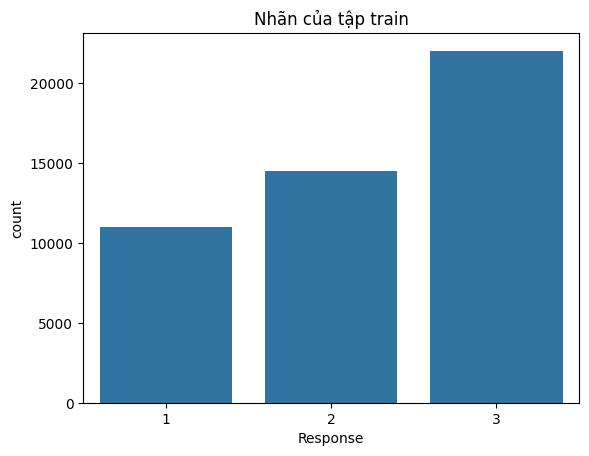

In [37]:
sns.countplot(x=y_train)
plt.title("Nhãn của tập train")

In [ ]:
# Phần trăm nhãn của tập train
y_train.value_counts() / len(y_train) * 100

Response
3    46.339256
2    30.469013
1    23.191731
Name: count, dtype: float64

Text(0.5, 1.0, 'Nhãn của tập validation')

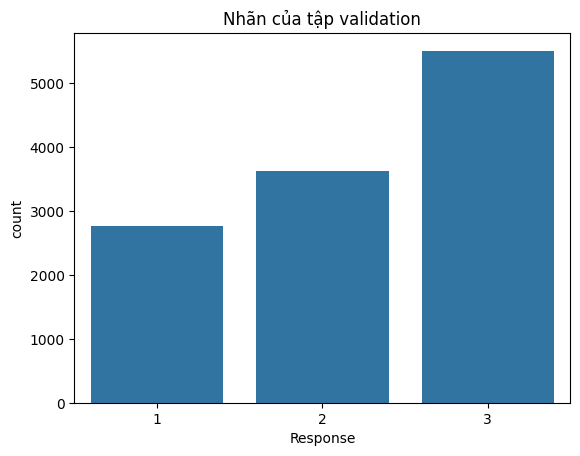

In [62]:
sns.countplot(x=y_val)
plt.title("Nhãn của tập validation")

In [ ]:
# Phần trăm nhãn của tập validation
y_val.value_counts() / len(y_val) * 100

Response
3    46.333249
2    30.470658
1    23.196093
Name: count, dtype: float64

# Chạy mô hình

- Lựa chọn mô hình Decision Tree 
## Lí do:
+ Dễ trực quan hóa bằng sơ đồ cây => dễ giải thích
+ Không sợ ngoại lai vì chia nhánh dựa trên độ hỗn loạn và độ tăng thông tin
+ Chống overfitting dễ dàng bằng cách điều chỉnh độ sâu tối đa, số lá tối thiểu, ...

In [37]:
clf_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Huấn luyện mô hình
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [38]:
# Dự đoán trên tập validation
y_pred = clf_dt.predict(X_val)

In [39]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88      2755
           2       0.87      0.88      0.88      3619
           3       0.92      0.92      0.92      5503

    accuracy                           0.90     11877
   macro avg       0.89      0.89      0.89     11877
weighted avg       0.90      0.90      0.90     11877



In [40]:
cross_val_score(clf_dt, X_val, y_val)

array([0.88510101, 0.87247475, 0.89052632, 0.88589474, 0.87705263])

Text(0.5, 1.0, 'Ma trận nhầm lẫn trước khi tối ưu mô hình')

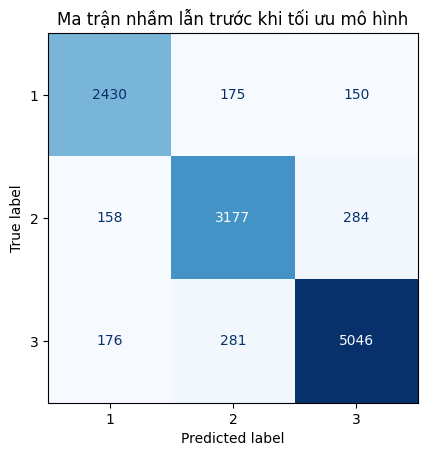

In [41]:
# Ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(clf_dt, X_val, y_val, cmap='Blues', colorbar=False)
plt.xticks([0, 1, 2], [1, 2, 3])
plt.yticks([0, 1, 2], [1, 2, 3])
plt.title("Ma trận nhầm lẫn trước khi tối ưu mô hình")

# Tối ưu mô hình

## Dùng GridSearchCV để tìm parameter
Lí do:
- Tối ưu toàn diện nhiều yếu tố: max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes, ...
- Các tham số trên trực tiếp ảnh hưởng đến độ sâu và độ phức tạp => tránh overfit/underfit
- Có thể kết hợp cross-validation
- Hợp với dữ liệu nhiều feature

In [42]:
param_grid = {
    'criterion': ['gini','entropy'],                       # Tiêu chí chia nhánh
    'max_depth': [4, 6, 8],                                # Giới hạn độ sâu
    'min_samples_split': [50, 100, 150],                   # Số mẫu tối thiểu để split
    'min_samples_leaf': [40, 50],                          # Số mẫu tối thiểu trong mỗi lá
    'class_weight': [None, 'balanced']                     # Cân bằng nhãn trong loss
}

In [43]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                                                  # Kiểm tra chéo 5 lần
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=1)

In [44]:
# Cây đẹp nhất
best_clf_dt = grid_search.best_estimator_

In [45]:
# Dự đoán trên tập validation bằng cây đẹp nhất
y_best_pred = best_clf_dt.predict(X_val)

In [46]:
print(classification_report(y_val, y_best_pred))

              precision    recall  f1-score   support

           1       0.98      0.83      0.90      2755
           2       0.86      0.91      0.88      3619
           3       0.91      0.94      0.93      5503

    accuracy                           0.91     11877
   macro avg       0.92      0.90      0.90     11877
weighted avg       0.91      0.91      0.91     11877



In [47]:
cross_val_score(best_clf_dt, X_val, y_val)

array([0.89183502, 0.89351852, 0.89810526, 0.89852632, 0.89726316])

Text(0.5, 1.0, 'Ma trận nhầm lẫn sau khi tối ưu mô hình')

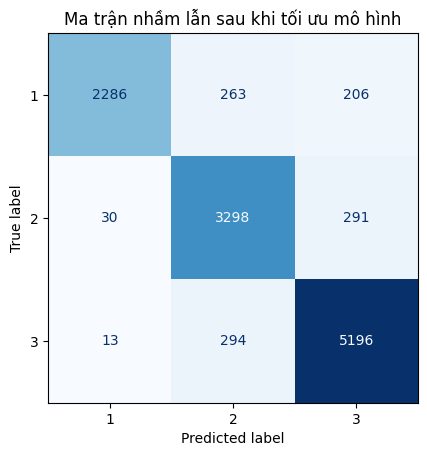

In [48]:
cm_best = confusion_matrix(y_val, y_best_pred)
disp = ConfusionMatrixDisplay(cm_best)
disp.plot(cmap='Blues', colorbar=False)
plt.xticks([0, 1, 2], [1, 2, 3])
plt.yticks([0, 1, 2], [1, 2, 3])
plt.title("Ma trận nhầm lẫn sau khi tối ưu mô hình")

In [49]:
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
# Chuyển nhãn y_val ([1, 2, 3]) thành dạng nhị phân (one-hot), ví dụ:
# [1, 2, 3] → [[1,0,0], [0,1,0], [0,0,1]].

n_classes = y_val_bin.shape[1]
# Lấy số lớp phân loại (ở đây là 3 lớp).

In [50]:
y_score = best_clf_dt.predict_proba(X_val)
# Trả về xác suất cho mỗi mẫu trong X_val

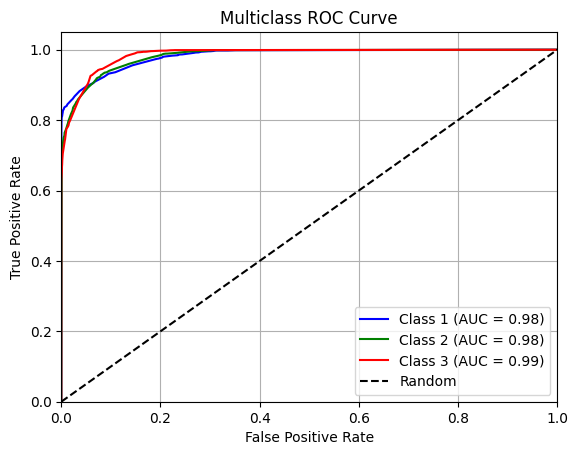

In [51]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Vẽ
plt.figure()
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Mô hình có khả năng phân loại rất tốt (AUC đều trên 0.9)!!

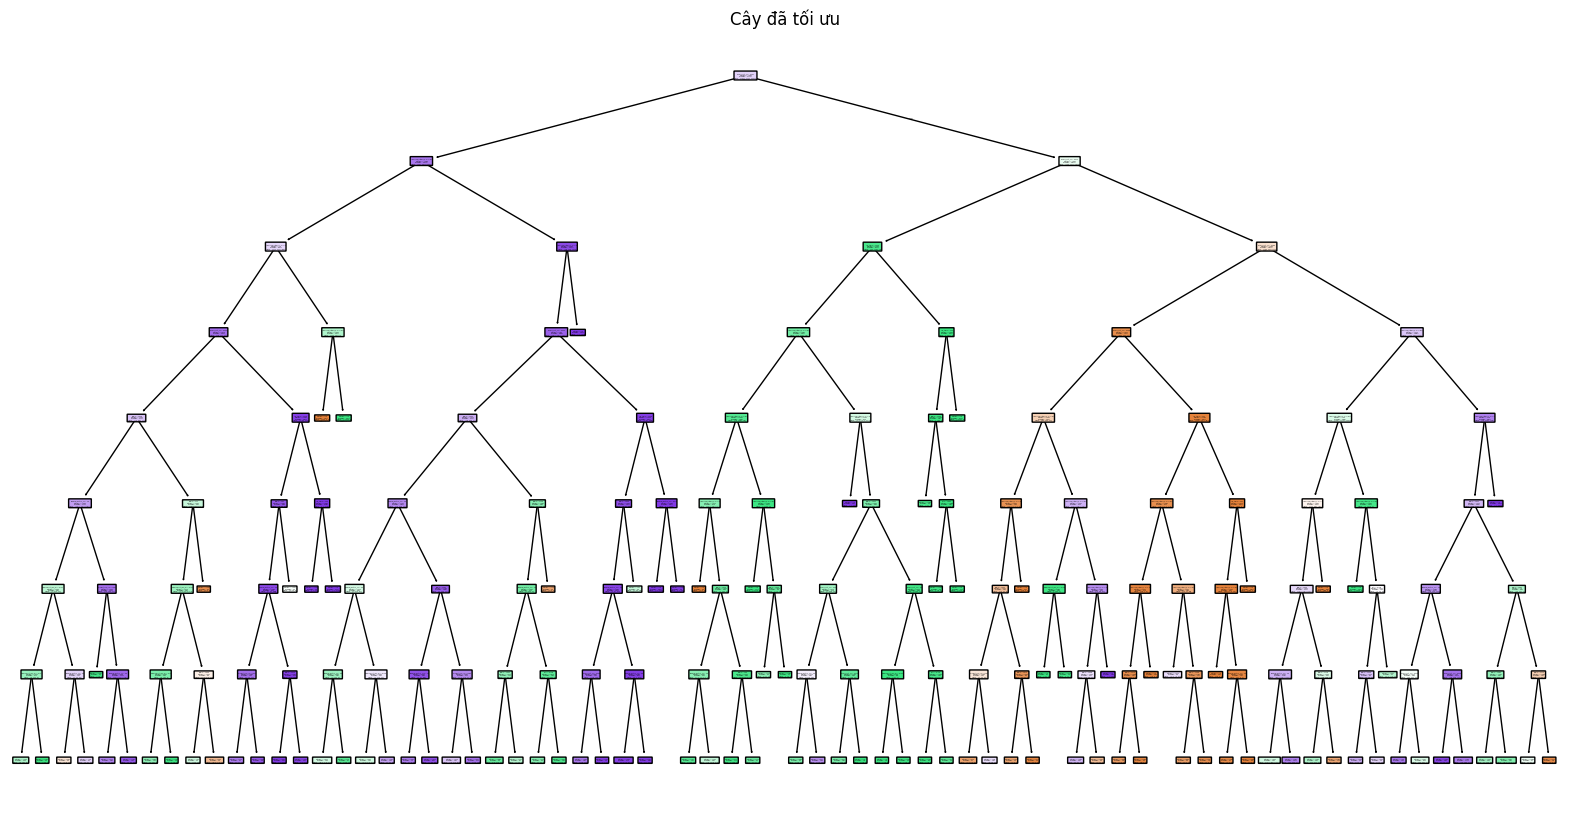

In [52]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf_dt, feature_names=train.columns, class_names=['1', '2', '3'], filled=True, rounded=True)
plt.title("Cây đã tối ưu")
plt.show()

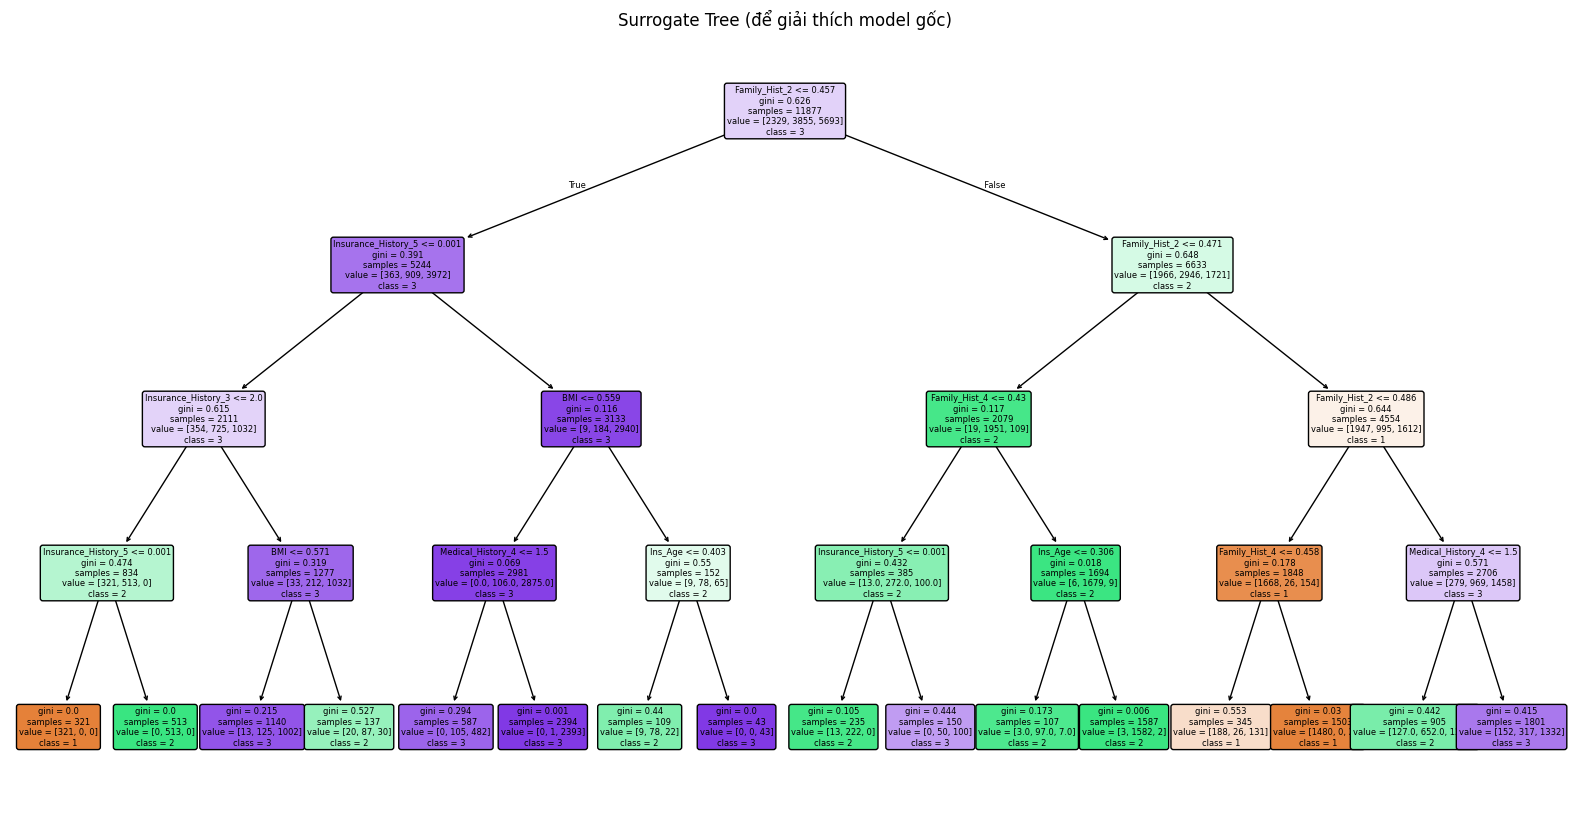

In [53]:
# Vẽ 1 cây phụ nhỏ để dễ giải thích

# Dự đoán của mô hình đã được tối ưu trên tập validation
y_best_pred_main = best_clf_dt.predict(X_val)

# Huấn luyện cây phụ
surrogate = DecisionTreeClassifier(max_depth=4, random_state=42)
surrogate.fit(X_val, y_best_pred_main)

plt.figure(figsize=(20, 10))
plot_tree(surrogate, feature_names=train.columns, class_names=['1', '2', '3'], filled=True, rounded=True, fontsize=6)
plt.title("Surrogate Tree (để giải thích model gốc)")
plt.show()

In [54]:
print(classification_report(y_best_pred_main, surrogate.predict(X_val)))

              precision    recall  f1-score   support

           1       0.92      0.85      0.88      2329
           2       0.90      0.84      0.87      3855
           3       0.88      0.94      0.91      5693

    accuracy                           0.89     11877
   macro avg       0.90      0.88      0.89     11877
weighted avg       0.89      0.89      0.89     11877



Text(0.5, 1.0, 'Ma trận nhầm lẫn của cây phụ')

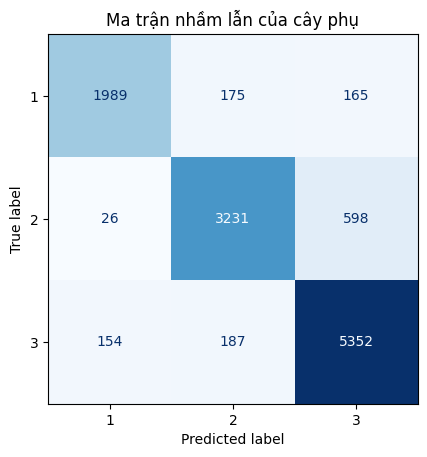

In [55]:
cm_sur = confusion_matrix(y_best_pred_main, surrogate.predict(X_val))
disp = ConfusionMatrixDisplay(cm_sur)
disp.plot(cmap='Blues', colorbar=False)
plt.xticks([0, 1, 2], [1, 2, 3])
plt.yticks([0, 1, 2], [1, 2, 3])
plt.title("Ma trận nhầm lẫn của cây phụ")

## Nhận xét về cây phụ so với cây chính đã tối ưu ở ma trận nhầm lẫn:
- Nhãn 1: Cây phụ dự đoán đúng 87% số mẫu so với cây chính.
- Nhãn 2: Cây phụ dự đoán 98% số mẫu so với cây chính.
- Nhãn 3: Cây phụ dự đoán đúng 103% số mẫu so với cây chính
- => Điều này cho thấy cây phụ không chỉ đơn giản hơn mà còn giữ lại được phần lớn quyết định đúng đắn của model gốc, giúp việc giải thích trở nên hiệu quả, đáng tin cậy.



In [56]:
# Kiểm tra độ quan trọng của thuộc tính đến mô hình
def check_importance(model, feature_names):
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Lọc các feature có độ quan trọng > 0
    importance_df = importance_df[importance_df['Importance'] > 0]
    
    print(importance_df)

check_importance(best_clf_dt, train.columns[:-1])

                Feature  Importance
33        Family_Hist_2    0.497324
28  Insurance_History_5    0.209289
29  Insurance_History_7    0.101668
27  Insurance_History_4    0.047128
10                  BMI    0.044748
7               Ins_Age    0.028128
34        Family_Hist_4    0.027333
38    Medical_History_4    0.022096
26  Insurance_History_3    0.011269
3        Product_Info_4    0.002726
31  Insurance_History_9    0.002683
16    Employment_Info_6    0.002417
35    Medical_History_1    0.002009
9                    Wt    0.000500
46   Medical_History_13    0.000370
32        Family_Hist_1    0.000133
36    Medical_History_2    0.000101
11    Employment_Info_1    0.000045
8                    Ht    0.000033


# Dự đoán nhãn cho tập test

In [57]:
# Dự đoán trên file test bằng mô hình tốt nhất
y_pred_test = best_clf_dt.predict(X_test)

In [58]:
# Tạo cột Response cho file test
test['Response'] = y_pred_test

In [59]:
# Lưu lại kết quả ra 1 file csv
test.to_csv('test_with_response.csv', index=False)